<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/JuneLeetCodePart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

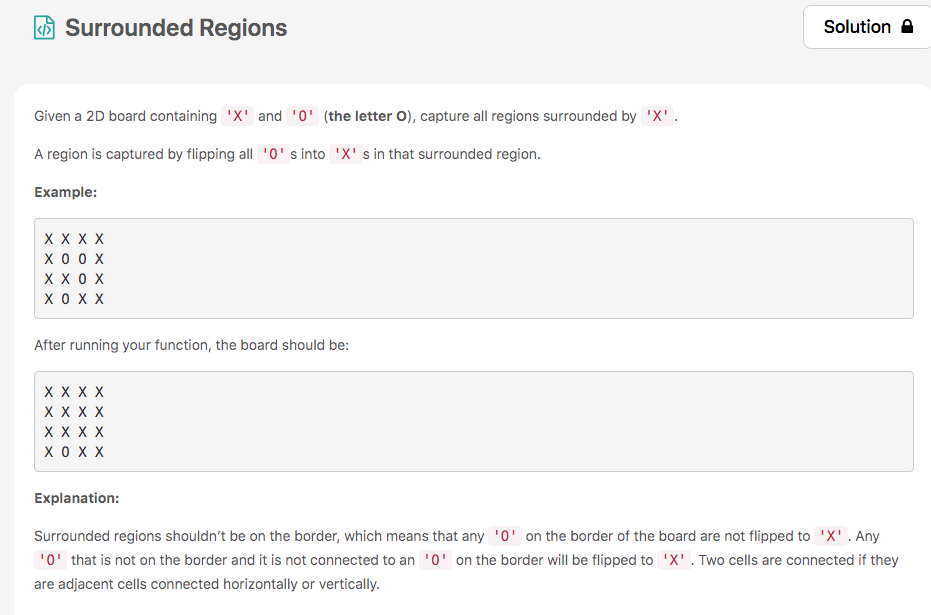

In [ ]:
'''June 17, 
same as counting island, using DFS
'''
class Solution:
    def solve(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        if not board or not board[0]:
            return 
        lenx,leny = len(board[0]), len(board)
        
        # Stack of cells to be checked 
        Expand = []
        
        # Put all the edge celss to the Stack
        for y in range(leny):
            Expand += [(y,0), (y,lenx -1)]
        for x in range(1,lenx -1):
            Expand += [(0,x), (leny -1,x)]
        
        # If cell contains 'O' temporary change it to 't' and add neighbours to stack
        while Expand:
            y, x = Expand.pop()
            # check limit out of bound values or 'X' will be ignored here. 
            if 0 <= y < leny and 0 <= x < lenx and board[y][x] == 'O': 
                board[y][x] = 'T'
                for dy, dx in [(1,0),(0,1),(-1,0),(0,-1)]:
                    Expand.append((y + dy,x + dx)) # these can go out of bound 
         # Change all the 'T' back to 'O' and all the 'O' to 'X'         
        for y in range(leny):
            for x in range(lenx):
                if board[y][x] == 'O':
                    board[y][x] = 'X'
                elif board[y][x] == 'T':
                    board[y][x] = 'O'


'''Using DFS '''

class Solution:
    def solve(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        if not board:
            return None
        m, n = len(board), len(board[0])

        # Use DFS to all the edges that contain 'O'
        for i in range(m):
            if board[i][0] == "O":
                self.dfs(i,0,board)
            if board[i][n-1] == "O":
                self.dfs(i,n-1,board)
        for j in range(n):
            if board[0][j] == "O":
                self.dfs(0,j,board)
            if board[m-1][j] == "O":
                self.dfs(m-1,j,board)
        
        # After finished changing all 'O' at the edges to 'N'
        for i in range(m):
            for j in range(n):
                if board[i][j] != "N":
                    board[i][j] = "X" # The rest elements to 'X'
                else:
                    board[i][j] = "O" # change 'N' to 'O'
    
    
    def dfs(self, i, j, board):
        m, n = len(board), len(board[0])
        if 0 <= i < m and 0 <= j < n and board[i][j] == "O":
            # to temporary change 'O' at the edges to 'N'
            board[i][j] = "N"  
            self.dfs(i+1,j,board)
            self.dfs(i-1,j,board)
            self.dfs(i,j+1,board)
            self.dfs(i,j-1,board)

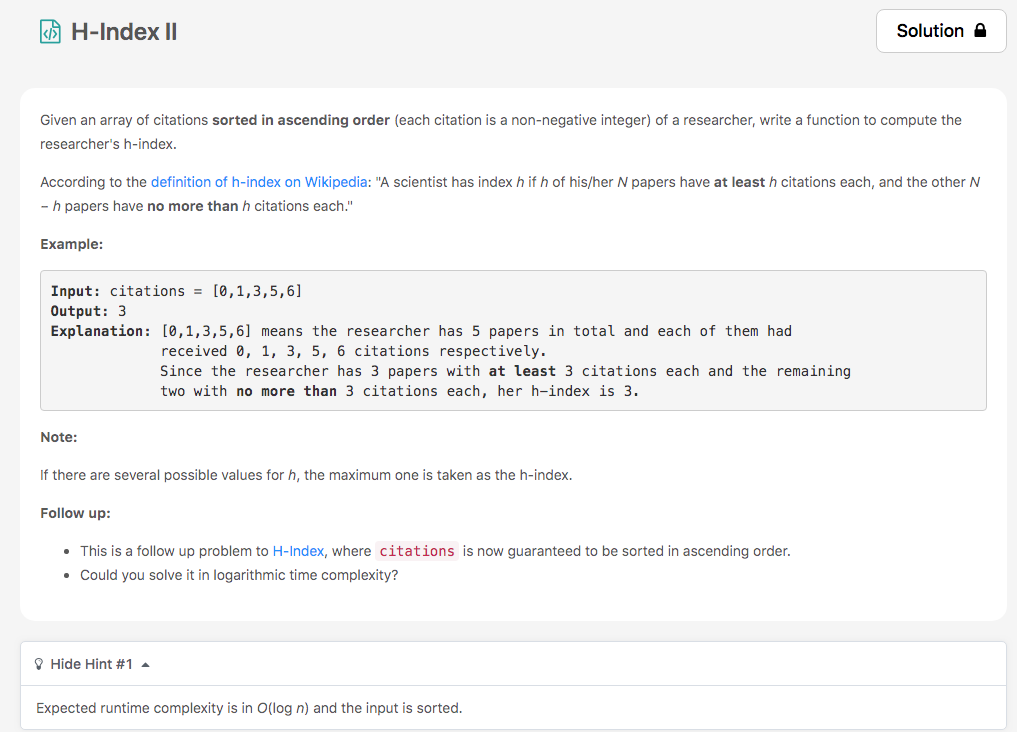

In [ ]:
''' June 18
H-Index II
Given an array of citations sorted in ascending order (each citation is a non-negative integer) of a researcher, write a function to compute the researcher's h-index.

According to the definition of h-index on Wikipedia: "A scientist has index h if h of his/her N papers have at least h citations each, and the other N − h papers have no more than h citations each."
'''
# Example:

# Input: citations = [0,1,3,5,6]
# Output: 3 
# Explanation: [0,1,3,5,6] means the researcher has 5 papers in total and each of them had 
#              received 0, 1, 3, 5, 6 citations respectively. 
#              Since the researcher has 3 papers with at least 3 citations each and the remaining 
#              two with no more than 3 citations each, her h-index is 3.

''' Note:
If there are several possible values for h, the maximum one is taken as the h-index.
'''

# bruteforce : time limit exceed
class Solution:
    def hIndex(self, citations: List[int]) -> int:
        if citations:
            for h in range(len(citations),0,-1):
                count = sum(map(lambda x : x>=h, citations))
                if count >= h:
                    return h
        return 0   

# Tracking it while iterate 

class Solution:
    def hIndex(self, citations: List[int]) -> int:
        if citations:
            ci_len = len(citations)
            for i in range(ci_len,0,-1):
                if citations[ci_len - i] >= i:
                    return i
         
        return 0   


# Fastest 128 ms using binary search

class Solution:
    def hIndex(self, citations: List[int]) -> int:
        if not citations:
            return 0
        
        left = 0
        right = len(citations)-1
        
        while left < right:
            mid = left + (right-left)//2
            
            if citations[mid] < len(citations) - mid:
                left = mid + 1
            else:
                right = mid
        
        return len(citations) - right if citations[right] >= (len(citations) - right) else 0

# 135 ms using binary search 

class Solution:
    def hIndex(self, citations: List[int]) -> int:
        n = len(citations)
        l, r = 0, n
        while l < r:
            idx = (l + r)//2
            if n - idx - 1 < citations[idx]:
                r = idx
            else:
                l = idx + 1
        return n - l

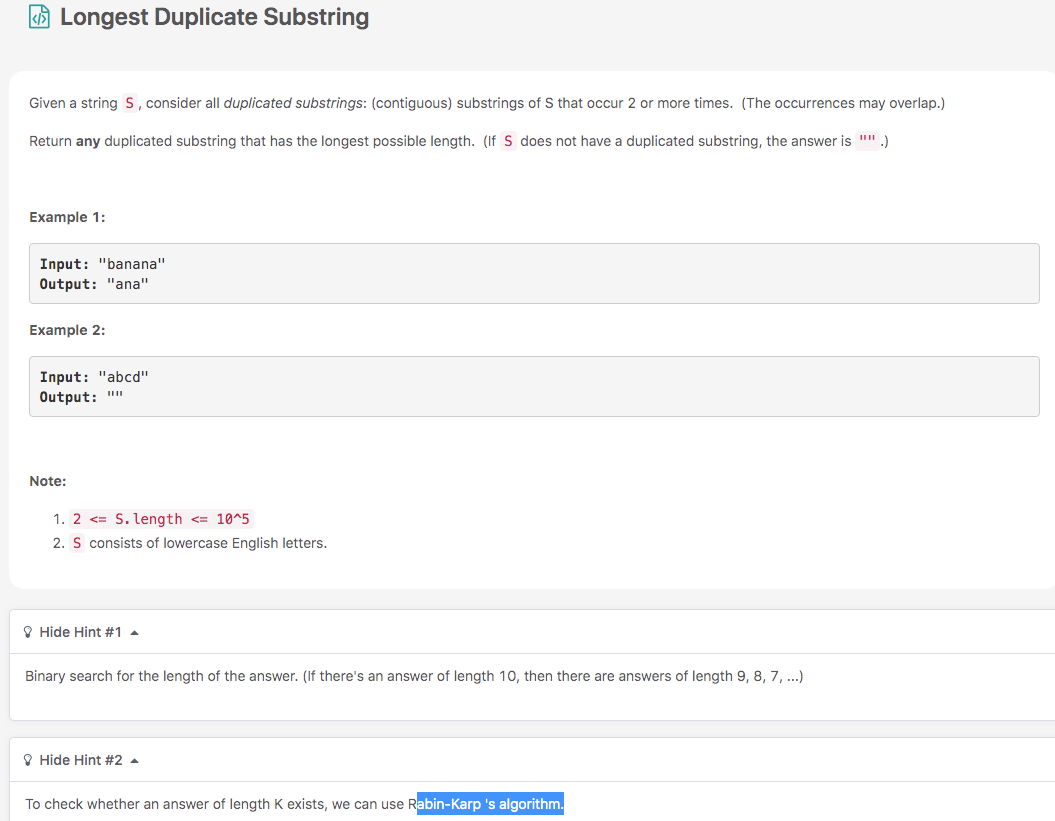

In [ ]:
''' June 19.  Longest Duplicate Substring
https://leetcode.com/problems/longest-duplicate-substring/discuss/695029/Python-Binary-search-O(n-log-n)-average-with-Rabin-Karp-explained

Example 1:
Input: "banana"
Output: "ana"

Example 2:
Input: "abcd"
Output: ""
 

Note:
2 <= S.length <= 10^5
S consists of lowercase English letters.
'''
# I have RabinKarp(text, M,q) function, where text is the string where we search patterns, M is the length we are looking for and q is prime modulo for Rabin-Karp algorighm.

# First, we need to choose d, I chose d = 256, because it is more than ord(z).
# Then we need to evaluate auxiliary value h, we need it for fast update of rolling hash.
# Evalute hash for first window
# Evaluate hashes for all other windows in O(n), using evaluated h.
# We keep all hashes in dictionary: for each hash we keep start indexes of windows.
# Finally, we iterate over our dictionary and for each unique hash we check all possible combinations and compare not hashes, but original windows to make sure that it was not a collision.

class Solution:
    def longestDupSubstring(self, S: str) -> str:
        def RK(text, M, q):
            if M == 0: return True
            h, t, d = (1<<(8*M-8))%q, 0, 256

            dic = defaultdict(list)

            for i in range(M): 
                t = (d * t + ord(text[i]))% q

            dic[t].append(i-M+1)

            for i in range(len(text) - M):
                t = (d*(t-ord(text[i])*h) + ord(text[i + M]))% q
                for j in dic[t]:
                    if text[i+1:i+M+1] == text[j:j+M]:
                        return (True, text[j:j+M])
                dic[t].append(i+1)
            return (False, "")
        
        
        beg, end = 0, len(S)
        q = (1<<31) - 1 
        Longest = ""
        
        while beg + 1 < end:
            mid = (beg + end)//2
            isLongest, candidate = RK(S, mid, q)
            if isLongest:
                beg, Longest = mid, candidate
            else:
                end = mid
        return Longest
                
                


In [ ]:
# Fastest solution 1190ms
# These following answers need to be commented carefully. 

MODULO = 100000000487  # prime

class Solution:
    def longestDupSubstring(self, S: str) -> str:
        ords = bytes(ord(c) - ord('a') for c in S)
        
        cumulatives = [0]
        for o in ords:
            cumulatives.append(
                ( cumulatives[-1] * 26 + o) % MODULO
            )

        def _duplicate(length):
            MULT = pow(26, length + 1, MODULO)
            hsh = cumulatives[length + 1]
            seen = {hsh}
            for start in range(1, len(S) - length):
                hsh = ((26 * hsh - MULT * ords[start - 1]) + ords[start + length]) % MODULO
                if hsh in seen:
                    return start
                seen.add(hsh)
            return None

        best = None
        best_len = -1
                
        left = 0
        right = len(S) - 1
        
        while right - left >= 2:
            middle = (left + right) // 2
            cand = _duplicate(middle)
            cand_len = middle + 1
            if cand is not None:
                if cand_len > best_len:
                    best = cand
                    best_len = cand_len
                    
                left = middle + 1
            else:
                right = middle - 1

        if best_len < left + 1:
            new_cand = _duplicate(left)
            if new_cand is not None:
                best = new_cand
                best_len = left + 1
                new_cand = _duplicate(right)
                if new_cand is not None:
                    best = new_cand
                    best_len = right + 1
        
        if best is None:
            return ''
        
        return S[best:best + best_len]



#2nd fastest solution
class Solution:
    def longestDupSubstring(self, S: str) -> str:        
        def search(L, nums, modulus, base, N):
            h = 0
            for i in range(L):
                h = (h*base + nums[i]) % modulus
            
            seen = {h}
            aL = pow(base, L, modulus)
            for i in range(N-L):
                h = (h * base - nums[i]*aL + nums[L+i]) % modulus
                if h in seen:
                    return i+1
                seen.add(h)
                
            return -1
        
        
        nums = [ord(c) - 97 for c in S]
        
        N = len(S)
        left, right = 1, N
        while left < right:
            L = (left + right)//2
            idx = search(L, nums, 4294967296, 26, N)
            #print(L, idx)
            if idx > -1:
                left = L+1
            else:
                right = L
        
        #print(left)
        if left:
            start = search(left-1, nums, 4294967296, 26, N)
            return S[start:start+left-1]
        return ''

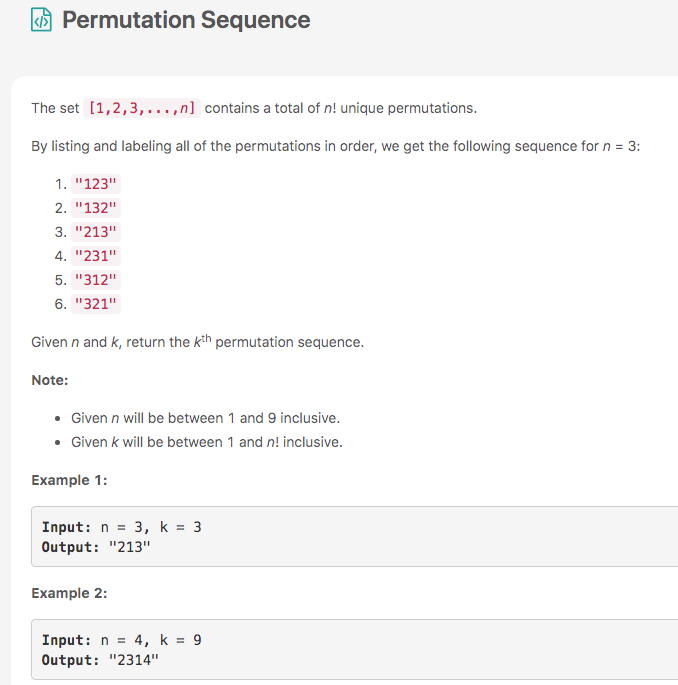

In [ ]:

''' June 20 Phone solution. 28 ms
'''
class Solution:
    def getPermutation(self, n: int, k: int) -> str:
        from math import factorial
        # Find each digit according to the ratio between k
        # and the total number of possible permutations
        # time - O(n**2) each iteration adds 1 digit and 09n for del from list
        # Space - O(n) to store chars list
        chars = [str(i) for i in range(1, n+1)] # symbols that will be permuted 
        permutations = factorial(n) # total number of permutations for n
        k -= 1 # change index to zero
        ret = []
        
        while chars:
            digit = n*k // permutations # get the 1st digit (range is 0 to n-1)
            ret.append(chars[digit])    # map from digit to symbol
            del chars[digit]            # remove that symbol
            permutations //= n          # repeat for next degit with decreased permutations, n & k
            k -=  digit * permutations
            n -= 1

        return "".join(ret)


### Fastest solutioin  12ms

class Solution(object):
    def get_factorial(self, n):
        factorial = 1
        for i in range(1, n + 1):
            factorial *= i
        return factorial
    def getPermutation(self, n, k):
        # * the symbols that will be permuted
        chars = [str(i) for i in range(1, n + 1)]
        # * total number of permutations for this n
        k -= 1  # * change indexing to 0
        permutations = self.get_factorial(n)
        result = []

        while chars:
            # * get the first digit (range is 0 to n-1)
            digit = n * k // permutations
            result.append(chars[digit])  # * map from digit to a symbol
            del chars[digit]  # * remove that symbol
            # * repeat for next digit with decreased permutations, n and k
            permutations //= n
            k -= digit * permutations
            n -= 1

        return "".join(result)


## 2nd Fastest solution 16 ms 
# using DFS pretty fast. 

class Solution:
    def getPermutation(self, n: int, k: int) -> str:
        nums = [str(i+1) for i in range(n)]
        
        def dfs(remainNums, remainK):
            if len(remainNums) == 1:
                return remainNums[0]
            
            div, mod = divmod(remainK-1, factorial(len(remainNums)-1))
            return remainNums[div] + dfs(remainNums[:div] + remainNums[div+1:], mod+1)
        
        return dfs(nums, k)

# 20 ms solution

class Solution:
    def getPermutation(self, n: int, k: int) -> str:
        nums = [str(i+1) for i in range(n)]
        factorials = [1]
        
        for i in range(1, n):
            factorials.append(factorials[-1] * i)
        
        k -= 1
        
        result = ""
        for i in range(n-1, -1, -1):
            idx = k // factorials[i]
            k -= idx * factorials[i]
            
            result += nums[idx]
            
            del nums[idx]
        
        return result

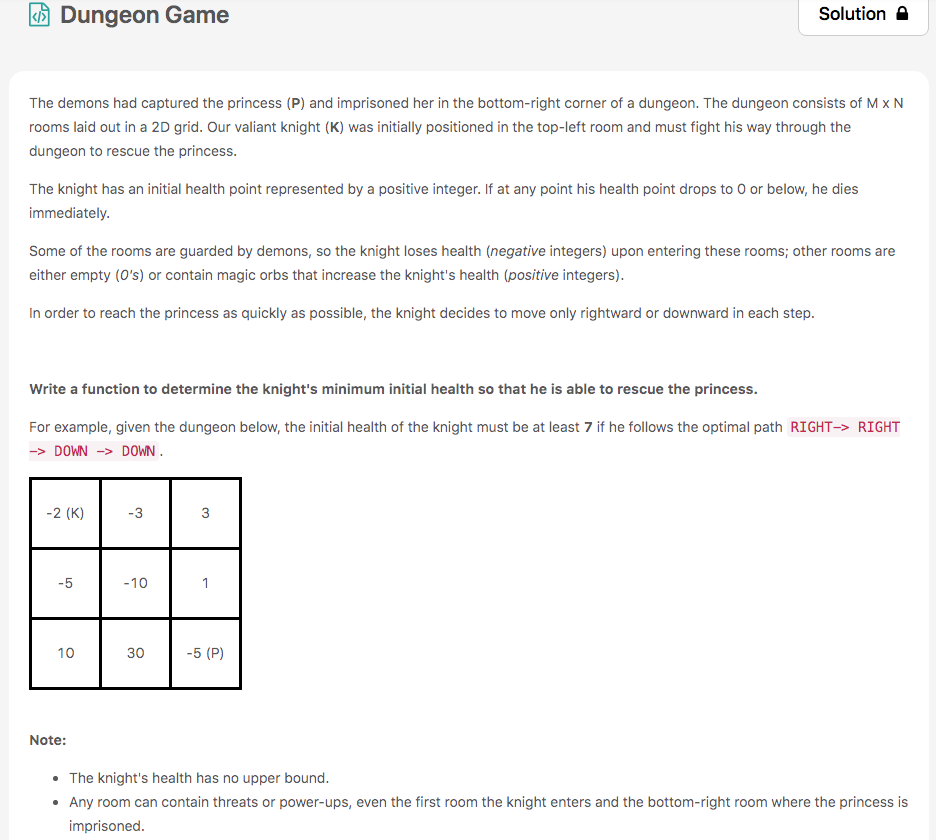

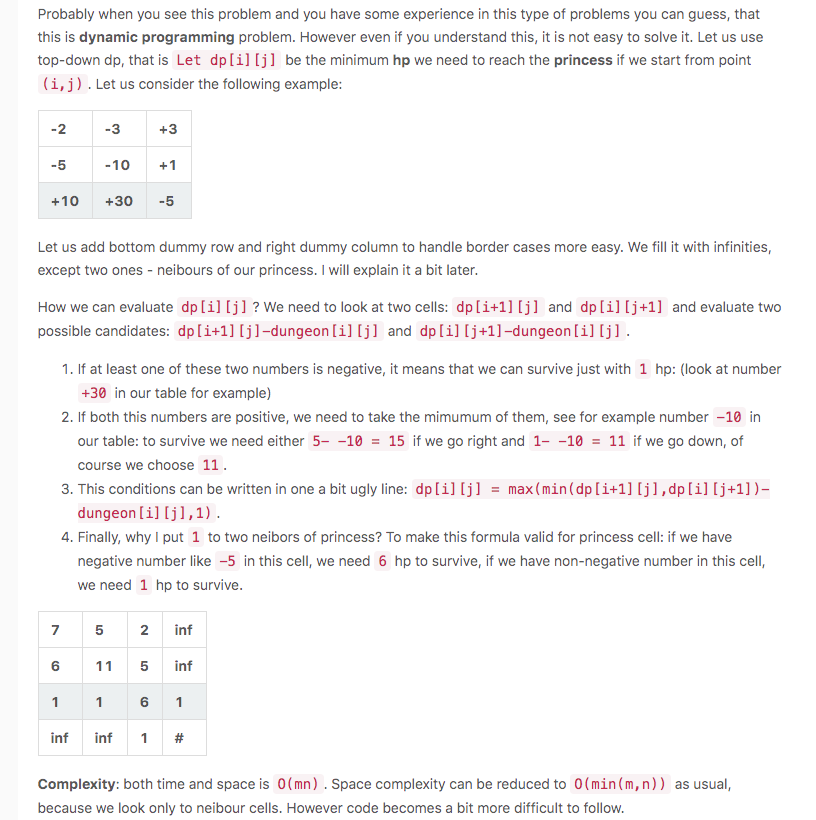

In [ ]:
# Leetcode challenge June 21. Dungeon Game 
# [Python] Short DP, 9 lines, top-down, explained as above 
class Solution:
    def calculateMinimumHP(self, dungeon: List[List[int]]) -> int:
        ''' DP, Min health to reach end from any room 
        is health lost or gained in that room and + min after moving down or right. 
        Minimum should be 1 since health can not be zero'''
        leny, lenx = len(dungeon), len(dungeon[0])
        
        # append new final colum of infinity except final room
        for y in range (leny -1):
            dungeon[y].append(float('inf'))
        # final room requires min health = 1
        dungeon[leny -1].append(1)
        # append new final row of infinity 
        dungeon.append([float('inf') for _ in range(lenx + 1)])
        
        for y in range(leny -1,-1,-1):
            for x in range(lenx -1, -1, -1):
                dungeon[y][x] = max( 1, -dungeon[y][x] + min(dungeon[y+1][x], dungeon[y][x+1]))
        
        return dungeon[0][0]




# Other solution 

class Solution:
    def calculateMinimumHP(self, dungeon):
        m, n = len(dungeon), len(dungeon[0])
        dp = [[0]*(n+1) for _ in range(m+1)]
        
        dp[m-1][n], dp[m][n-1] = 1, 1
        for i in range(m-1): dp[i][n] = float("inf")
        for j in range(n-1): dp[m][j] = float("inf")
            
        for i in range(m-1,-1,-1):
            for j in range(n-1,-1,-1):
                dp[i][j] = max(min(dp[i+1][j],dp[i][j+1])-dungeon[i][j],1)
        
        return dp[0][0]

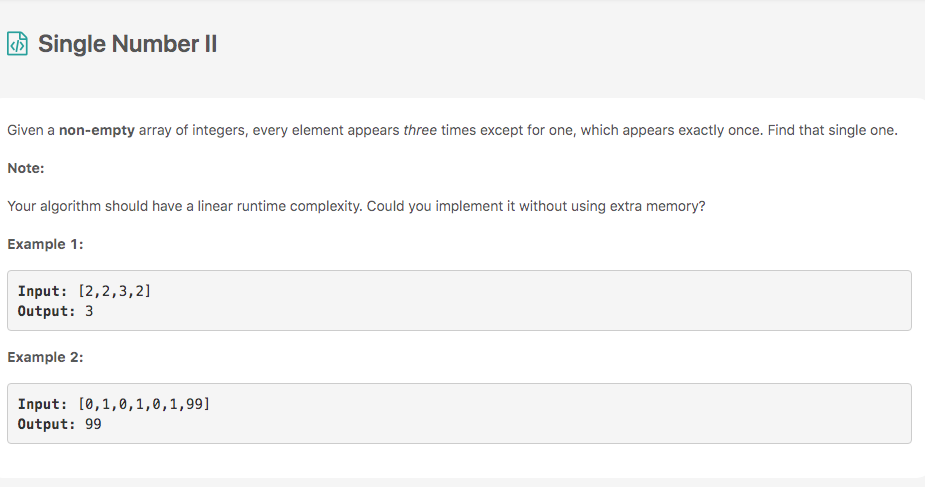

In [ ]:
''' June LeetCode Challenge day 22. 

'''
# using extra space 1
class Solution:
    def singleNumber(self, nums: List[int]) -> int:
        
        return (sum(set(nums))*3 - sum(nums))//2

# using extra space 2, Counter

from collections import Counter
class Solution:
    def singleNumber(self, nums: List[int]) -> int:
        s=Counter(nums)
        return s.most_common()[-1][0]

# Using extra space 3, Dict

class Solution:
    def singleNumber(self, nums: List[int]) -> int:
        dict = {}
        
        for val in nums:
            if not val in dict: 
                dict[val] = 1
            else:
                dict[val] += 1
        
        for k,v in dict.items():
            if v == 1:
                return k


# using bit manipulation  ****
class Solution:
    def singleNumber(self, nums: List[int]) -> int:
        x1, x2, mask = 0, 0, 0
        for i in nums:
            x2 = x2 ^ (x1 & i)
            x1 = x1 ^ i
            # print(x2, x1)
            mask = ~(x1 & x2)
            
            x1 = x1 & mask
            x2 = x2 & mask
            # print(i, mask, x1, x2)
        return x1


# Beautiful 
class Solution:
    def singleNumber(self, nums: List[int]) -> int:
        one = two = 0
        
        for num in nums:
            one = ~two & (one ^ num)
            two = ~one & (two ^ num)
            
        return one
        

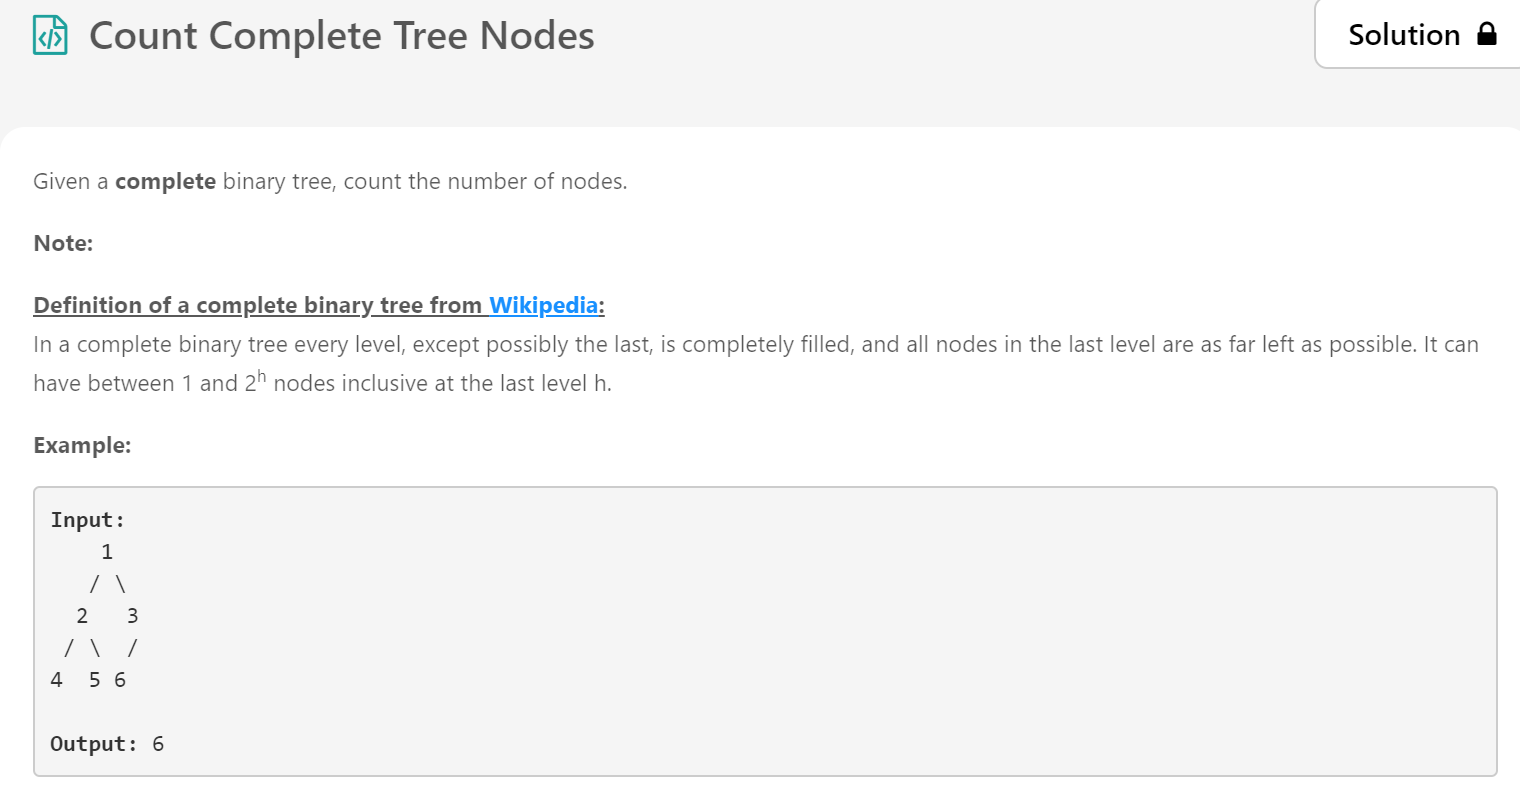

In [ ]:
''' Count complete Tree Nodes - June 23

'''
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def countNodes(self, root: TreeNode) -> int:
        
        if not root:
            return 0

        left_depth = self.FindDepth(root.left)
        right_depth = self.FindDepth(root.right)
            
        if left_depth == right_depth:
            return 2**left_depth + self.countNodes(root.right)
        else:
            return self.countNodes(root.left) + 2**right_depth
        
    def FindDepth(self, node : TreeNode):
        depth = 0        
        while node:
            node = node.left
            depth += 1
            
        return depth


# similar recursive function

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:     
    def find_depth(self, node):
        if not node:
            return 0
        return 1 + self.find_depth(node.left)
    def countNodes(self, root: TreeNode) -> int:
        if not root:
            return 0
        ld = self.find_depth(root.left)
        rd = self.find_depth(root.right)
        if ld == rd:
            return 2**ld + self.countNodes(root.right)
        else:
            return 2**rd + self.countNodes(root.left)

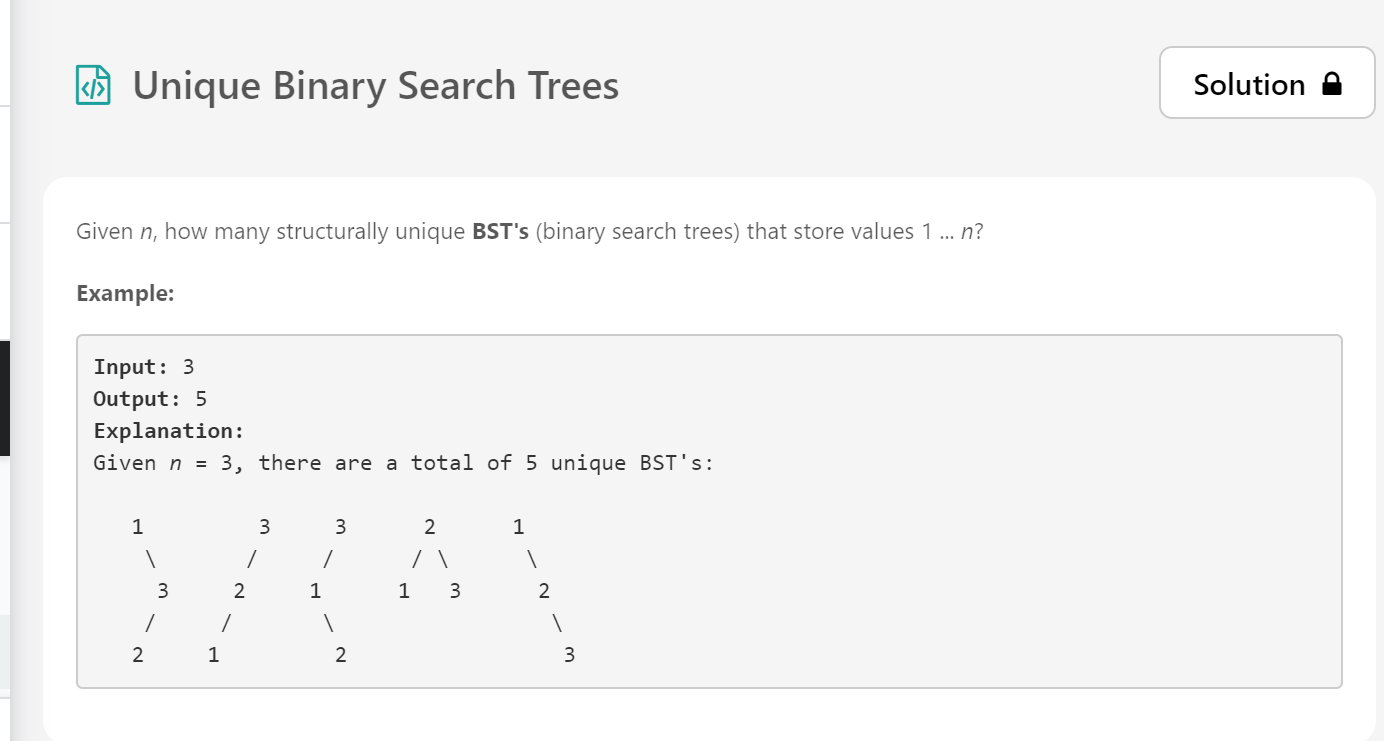

In [ ]:
''' June 24th Unique binary search Trees'''
# My phone solution 
class Solution:
    def numTrees(self, n: int) -> int:
        '''Dynamic Programming. Base case of 1 for n = 0 or n = 1.
        For each of n possible root nodes, multiply the the left subtree
        with the right subtree
        '''
        mem = [None for a in range(n+1)] # mem[i] is number of ways for i nodes
        return self.dp(n,mem)
    
    def dp (self,n,mem):
        count = 0
        if n <= 1:
            return 1 # 1 tree for n == 0 (empty tree) or 1 tree for n==1 

        if mem[n] != None:
            return mem[n] # already count
        
        for i in range(1,n+1):
          # take each number 1, ..., n as root
          # all numbers < i form left subtree, all > i form right subtree
          # multiply possibilites
            count += self.dp(i-1,mem) * self.dp(n-i,mem)
        mem[n] = count
        return count


# Fastest solution 
class Solution:
    def numTrees(self, n: int) -> int:
        dp = [0]*(n+1)
        dp[0] = 1
        
        for i in range(1, n+1):
            for j in range(i):
                dp[i] += dp[j] * dp[i-1-j]
        
        return dp[-1]

# similar 
class Solution:
    def numTrees(self, n: int) -> int:
        dp = [0]*(n+1)
        dp[0]=dp[1] = 1
        for i in range(2,n+1):
            for j in range(1, i+1):
                dp[i] += dp[j-1]*dp[i-j]
        return dp[n]


# Best for memory

class Solution:
    
    def __init__(self):
        self.dict = {}
        self.dict[0] = 1
        self.dict[1] = 1
    
    def numTrees(self, n: int) -> int:
        if n in self.dict:
            return self.dict[n]
        count = 0        
        for i in range(n):
            count += self.numTrees(i)*self.numTrees(n-i-1)
            # print(count)
        self.dict[n] = count
        return count


#  1 line solution CHECK the below pic
'''There is a formula that given n nodes, the possible binary search trees are (2*n )C n / (n+1)
Refer (3:44) Abdul Bari OBST video
https://www.youtube.com/watch?v=vLS-zRCHo-Y'''

class Solution:
    def numTrees(self, n: int) -> int:
        return math.comb(2*n, n) // (n+1)

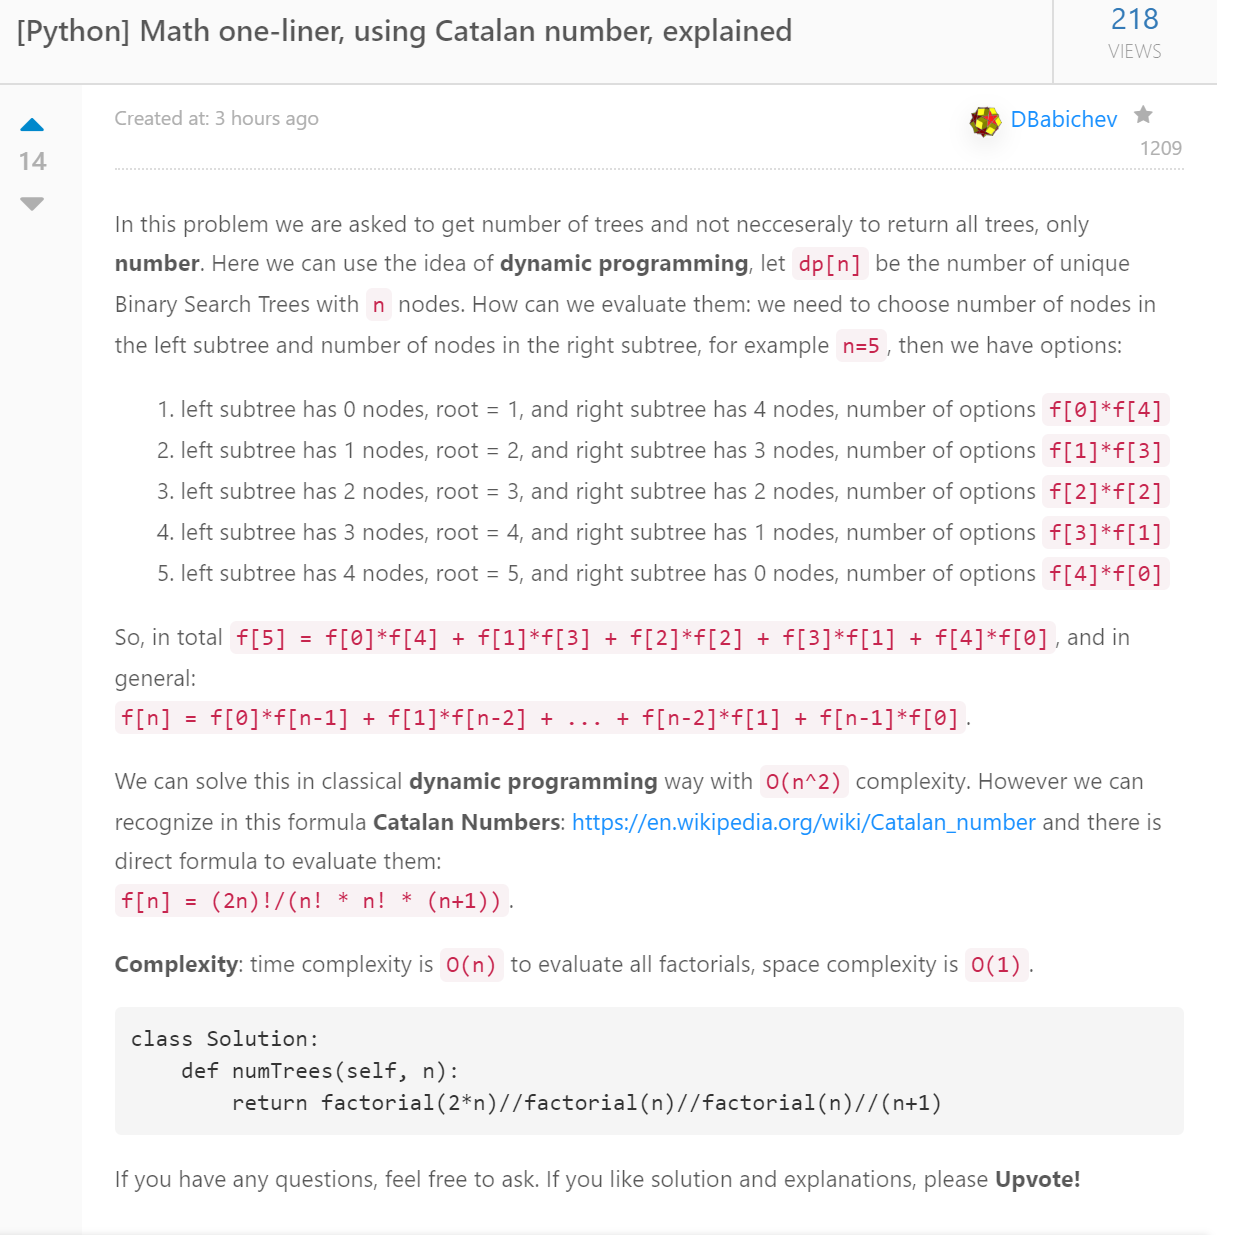

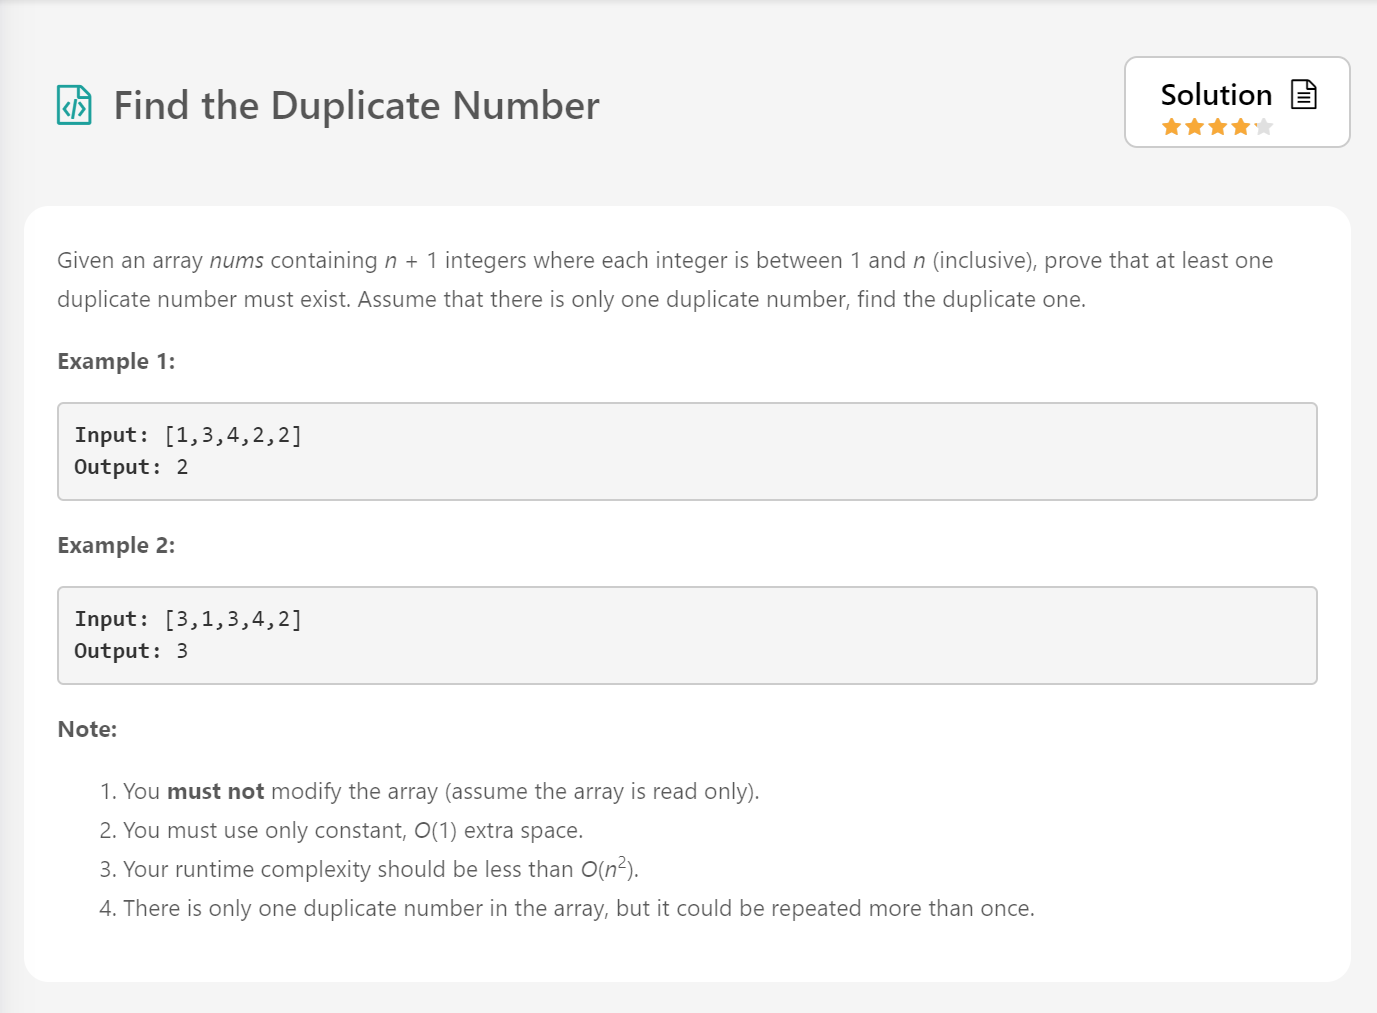

In [ ]:
''' June 25 Find the Duplicate Number
 Using binary search for this problem 
https://leetcode.com/articles/find-the-duplicate-number/

'''
# quiet dump solution 
class Solution:
    def findDuplicate(self, nums: List[int]) -> int:
        
        a_dict = Counter(nums)
        for key, value in a_dict.items():
            if value > 1:
                return key


# LeetCode Article solution https://leetcode.com/articles/find-the-duplicate-number/
class Solution:
    def findDuplicate(self, nums):
        # Find the intersection point of the two runners.
        tortoise = hare = nums[0]
        while True:
            tortoise = nums[tortoise]
            hare = nums[nums[hare]]
            if tortoise == hare:
                break
        
        # Find the "entrance" to the cycle.
        tortoise = nums[0]
        while tortoise != hare:
            tortoise = nums[tortoise]
            hare = nums[hare]
        
        return hare



# Fastest solution 
class Solution:
    def findDuplicate(self, nums: List[int]) -> int:
        
        n = len(nums)-1
        left, right = 1, n
        while left < right:
            mid = left + (right-left)//2
            print("mid:", mid)
            cnt = 0
            for num in nums:
                if num <= mid:
                    cnt += 1
            if cnt > mid:
                right = mid
            else:
                left = mid + 1
        return right



# 2nd fastest solution 
class Solution:
    def findDuplicate(self, nums: List[int]) -> int:
        # searching: time O(n) or O(log n), space O(n)
        slow = fast = nums[0]
        while True:
            slow = nums[slow]
            fast = nums[nums[fast]]
            print("slow: ", slow, "fast: ",  fast)
            if slow == fast:
                break
        slow = nums[0]
        while slow != fast:
            slow = nums[slow]
            fast = nums[fast]
        
        return slow
        
#         # hashtable: time O(n), space O(n)
#         import collections
#         counter = collections.Counter(nums)
#         for k,v in counter.items():
#             if v >= 2: 
#                 return k
#         return None

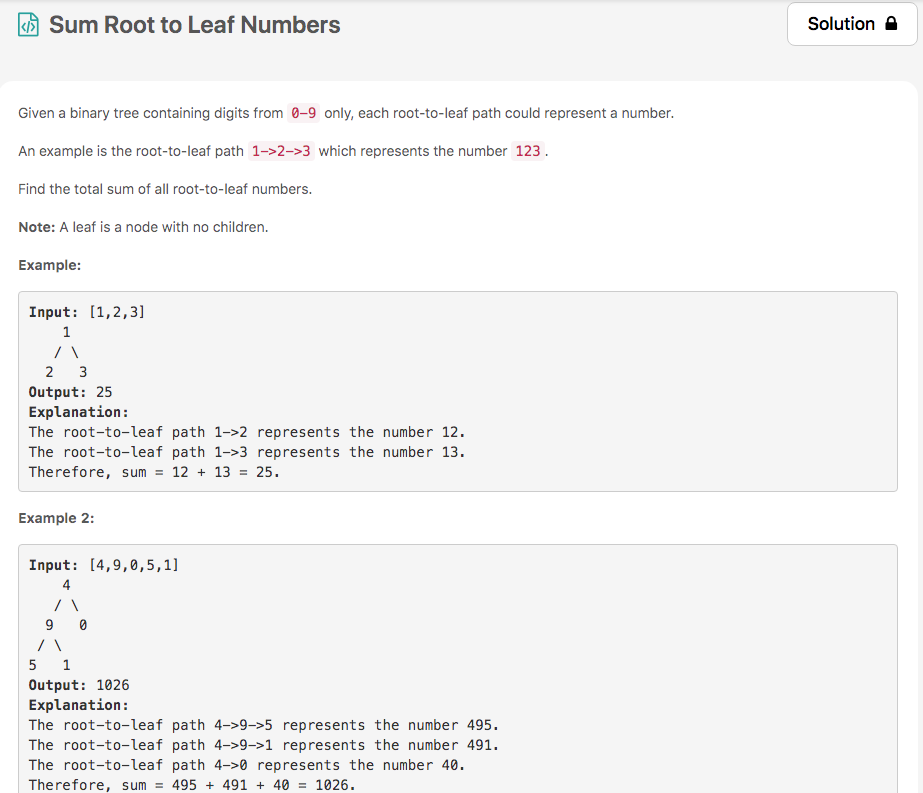

In [ ]:
''' June 26 Sum root to Leaves Number
my solution, iterate all root to leave paths and sum on the way
Other solution source : https://www.youtube.com/watch?v=tanL9EJVfrU&feature=youtu.be
'''
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def sumNumbers(self, root: TreeNode) -> int:
        ret = [0]
        
        def printRoute(stack, node, ret): 
            if node == None: 
                return

            # append this node to the path array 
            stack.append(node.val)           
            if(node.left == None and node.right == None): 
                # print out all of its  
                # root - to - leaf 
                
                ret[0] += sum(d * 10**i for i, d in enumerate(stack[::-1]))
                # ret[0] += int("".join(map(str, stack))) 
        
            # otherwise try both subtrees 
            printRoute(stack, node.left, ret) 
            printRoute(stack, node.right, ret) 
            stack.pop() 

        printRoute([], root, ret) 
     
        return ret[0]


# Fastest solution 
class Solution:
    def sumNumbers(self, root: TreeNode) -> int:
        
        self.total = 0
        
        if root == None:
            return 0
        
        def makeTotal(curr, curr_val = -1):
            
            if curr_val == -1:
                curr_val = curr.val
            else:
                curr_val = curr_val*10 + curr.val
                
            if not curr.left and not curr.right:
                self.total += curr_val
                
            if curr.left:
                makeTotal(curr.left, curr_val)

            if curr.right:
                makeTotal(curr.right, curr_val)
            
        
        makeTotal(root)
        
        return self.total

# 2nd fastest 
class Solution:
    def sumNumbers(self, root: TreeNode) -> int:
        s = 0
        def func(root, s):
            if not root:
                return 0
            if not root.left and not root.right:
                return s * 10 + root.val
            else:
                s = s * 10 + root.val
                return func(root.left,s) + func(root.right,s)
        return func(root,s)

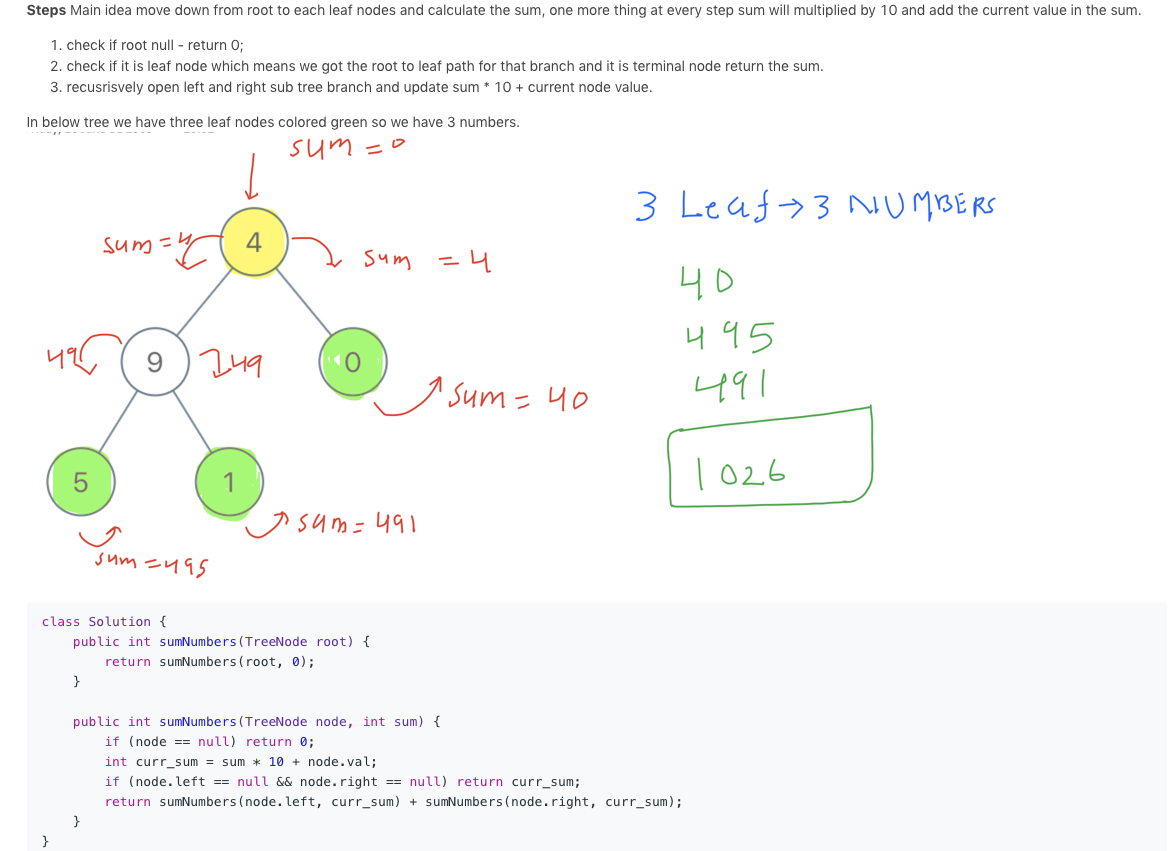

In [ ]:
# dfs + stack
def sumNumbers1(self, root):
    if not root:
        return 0
    stack, res = [(root, root.val)], 0
    while stack:
        node, value = stack.pop()
        if node:
            if not node.left and not node.right:
                res += value
            if node.right:
                stack.append((node.right, value*10+node.right.val))
            if node.left:
                stack.append((node.left, value*10+node.left.val))
    return res
    
# bfs + queue
def sumNumbers2(self, root):
    if not root:
        return 0
    queue, res = collections.deque([(root, root.val)]), 0
    while queue:
        node, value = queue.popleft()
        if node:
            if not node.left and not node.right:
                res += value
            if node.left:
                queue.append((node.left, value*10+node.left.val))
            if node.right:
                queue.append((node.right, value*10+node.right.val))
    return res
    
# recursively 
def sumNumbers(self, root):
    self.res = 0
    self.dfs(root, 0)
    return self.res
    
def dfs(self, root, value):
    if root:
        #if not root.left and not root.right:
        #    self.res += value*10 + root.val
        self.dfs(root.left, value*10+root.val)
        #if not root.left and not root.right:
        #    self.res += value*10 + root.val
        self.dfs(root.right, value*10+root.val)
        if not root.left and not root.right:
            self.res += value*10 + root.val

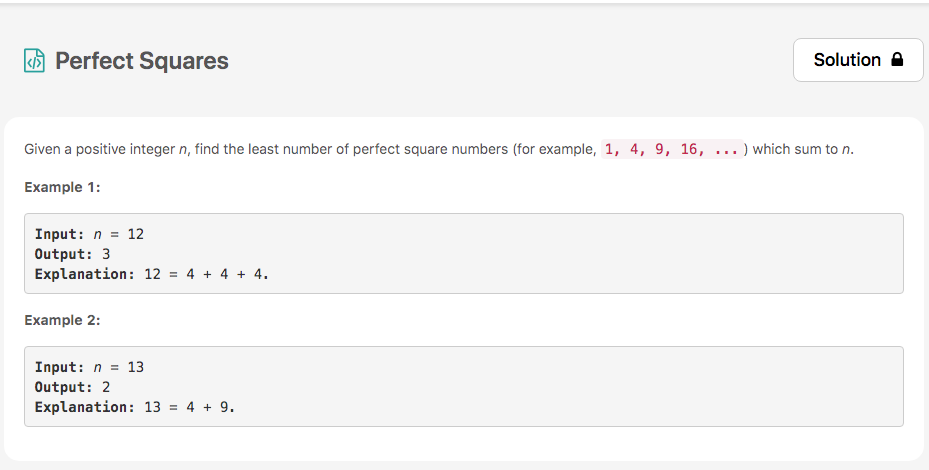

In [ ]:
''' June 27 Sum root to Perfect Squares 
Dynamic programming : phone solution 
'''
class Solution:
    mem = [0, 1]
    def numSquares(self, n: int) -> int:
        while len(self.mem) <= n:
            self.mem.append(1 + min(self.mem[-i*i] for i in range(1, int(len(self.mem)**0.5)+1)))

        return self.mem[n]


##### explained algorithm https://leetcode.com/problems/perfect-squares/discuss/707511/Recursive-or-Top-Down-or-Bottom-Up-DP-or-Explained-Recursion-Tree


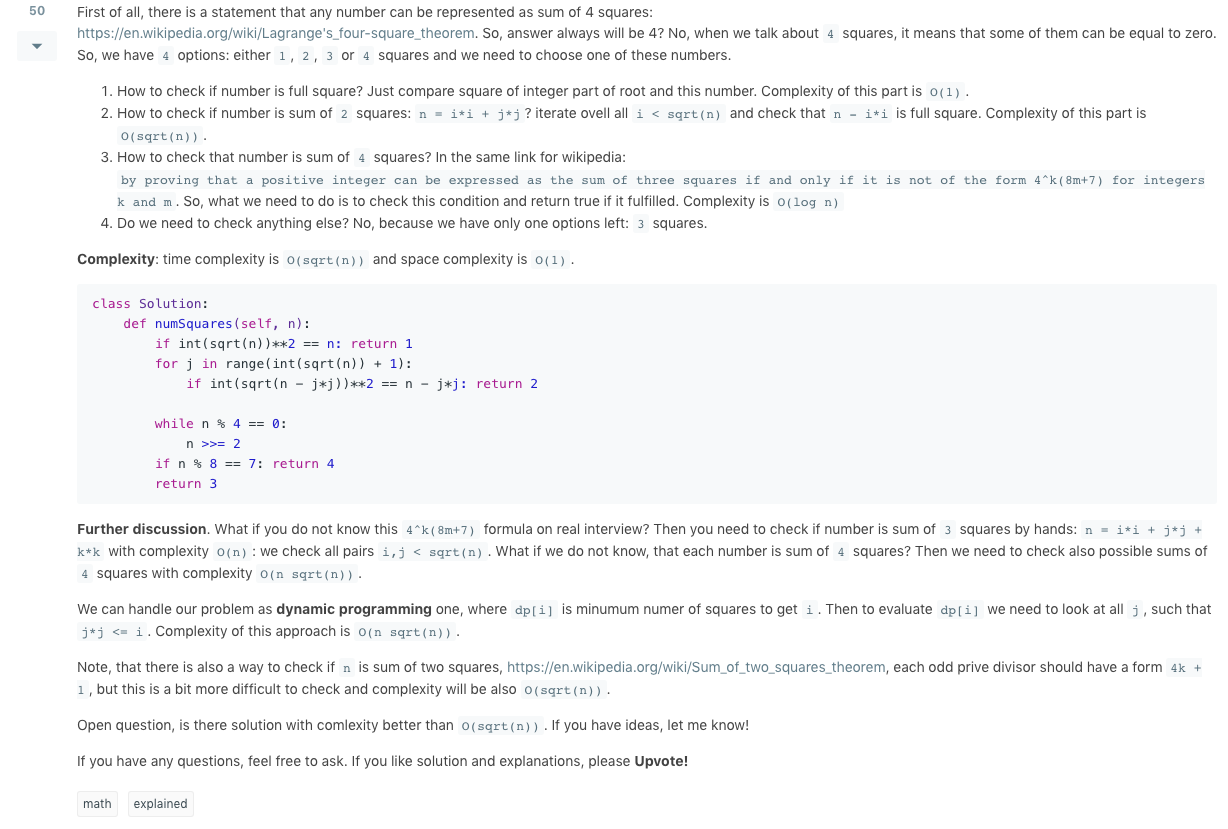

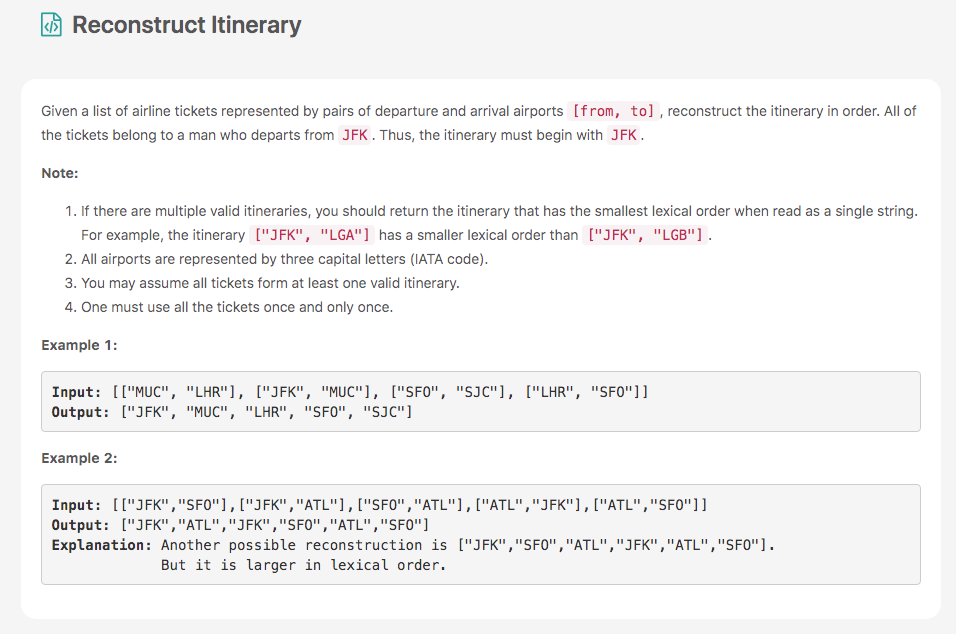

In [ ]:
''' June 28 Reconstruct Itinerary
Dynamic Programming - Phone solution 

'''
from collections import defaultdict
class Solution:
    def findItinerary(self, tickets: List[List[str]]) -> List[str]:
        # reverse start destination, then ties broken by reverse end
        tickets.sort(reverse = True)
        flights = defaultdict(list)
        
        # key is start, value is list of ends (Lowest alphabetical is the last)
        for depart,arrive in tickets:
            flights[depart].append(arrive)
        
        path = []
        
        def check(airport):
            while flights[airport]:
                check(flights[airport].pop())
            path.append(airport)
        
        check("JFK")
        return path[::-1]

# 2nd fastest solution 64 ms
# @lc code=start
# TAGS eulerian path, classic
# Simple but hard.
# Trick:
#   a connected graph has an euler cycle iff #in(v) = #out(v) for every vertice
#   it has an open euler walk iff there is exactly two vertices with odd degree
#     (in(v) = out(v) + 1 for one vertice, out(v) = in(v) + 1 for the other
#
#   Idea: To find a path, walk greedily, by consuming edges from start,
#   necessarily reach finish, then add missing cycles

#   This idea doesn't lead directly to an algorithm, but we get the same
#   result with simple DFS, the trick is to construct the path backward
#
#   looks very much like a topological sort, except that we don't use
#   a `seen` set

# LEARN THIS ALGORITHM
# - *almost post-order dfs* print backward the visited nodes
# - unlike dfs, we don't mark visited nodes, as we may visited them more
#   than once
# - in order not too loop, visit each edge once (simply remove it from the adjacency list)

#

from collections import defaultdict

class Solution:
    def findItinerary(self, tickets: List[List[str]]) -> List[str]:
        d = defaultdict(list)
        tickets.sort(key=lambda x: x[1], reverse=True)
        for u, v in tickets:
            d[u].append(v)

        res = []
        def f(n):
            while d[n]:
                f(d[n].pop())
            res.append(n)
        f('JFK')

        # Normal DFS doesn't work
        #  because we don't visit twice the same node
        # seen = {'JFK'}
        # res = []
        # def f(x):
        #     for v in d[x]:
        #         if v not in seen:
        #             seen.add(v)
        #             f(v)
        #     res.append(x)
        # f('JFK')

        return res[::-1]  # pythonic

In [ ]:
class Solution:
    def findItinerary(self, tickets: List[List[str]]) -> List[str]:
#### By Euler path using DFS
        self.graph = collections.defaultdict(list)
        for frm,to in tickets:
            self.graph[frm].append(to)
            
        for k,v in self.graph.items():
            v.sort()
        
        self.ans = []
        self.DFS("JFK")
        return self.ans[::-1]
    
    def DFS(self,src):
        
        dest = self.graph[src]
        while dest:
            nextD = dest.pop(0)
            self.DFS(nextD)
        self.ans.append(src)
        
## by DFS way
#         self.graph = collections.defaultdict(list)#need list data type in case of samee destination visited more than ones
#         self.visited = dict()
        
#         for frm,to in tickets:
#             self.graph[frm].append(to)
            
#         print(self.graph)
#         for k,v in self.graph.items():
#             v.sort()
#             self.visited[k] = [False]*len(v)
            
#         self.flights = len(tickets)
#         self.ans = []
#         src = "JFK"
#         self.DFS("JFK",["JFK"])
#         return self.ans
    
#     def DFS(self,src,ans):     
#         if len(ans) == self.flights+1:
#             self.ans = [v for v in ans]
#             return True
        
#         for i,dest in enumerate(self.graph[src]):
#             if not self.visited[src][i]:
#                 self.visited[src][i]=True
#                 # print(src,"==",self.graph)
#                 res = self.DFS(dest,ans+[dest])
#                 self.visited[src][i]=False
#                 if res:
#                     return True

#         return False

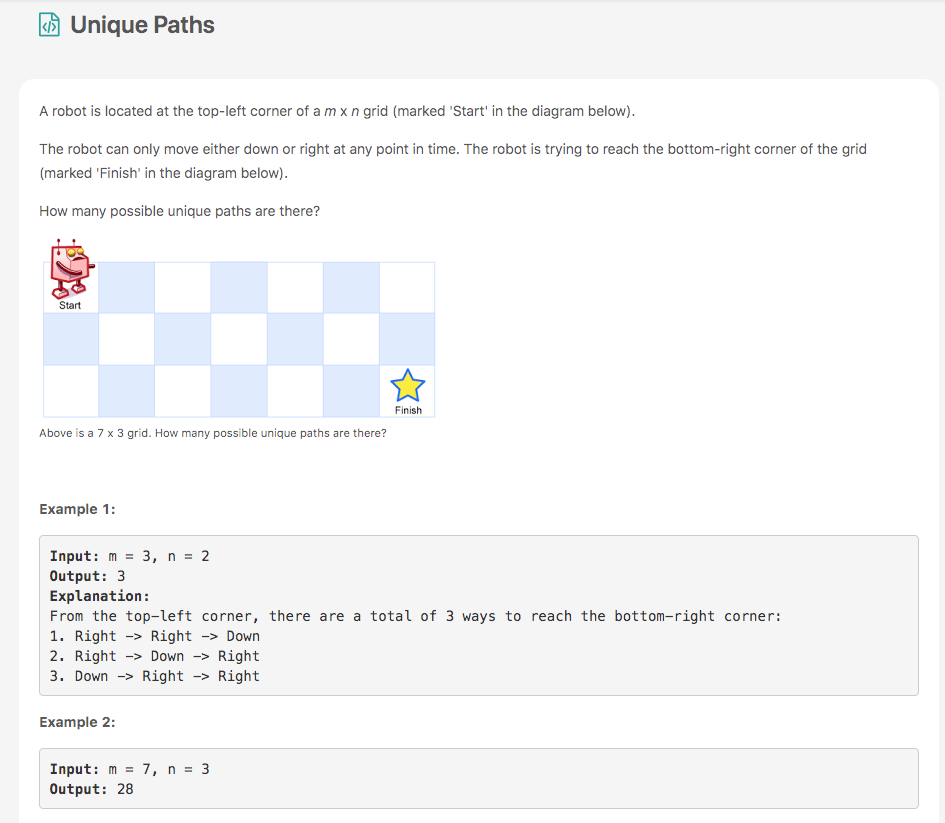

In [ ]:
''' June 29   Unique Paths

Constraints:

1 <= m, n <= 100
It's guaranteed that the answer will be less than or equal to 2 * 10 ^ 9.
'''
# link: https://leetcode.com/explore/featured/card/june-leetcoding-challenge/543/week-5-june-29th-june-30th/3375/discuss/711209/Summary-of-4-different-solutions-w-Recursion-Tree
class Solution:
    def uniquePaths(self, m: int, n: int) -> int:
        ''' DP, nb paths = paths from above cell + path from the right cell
        alternatively, catalan number 
        m: number of columns, n:number of rows
        Time O(m * n)
        Space O(n), only keep the last row instead of the entire grid'''
        
        # first row then one path to each column
        paths_of_row  = [1 for _ in range(n)]
        
        # iterate though each row
        for row in range(m-1):
            paths_of_new_row = [1]
            for col in range(1,n):
                paths_of_new_row.append(paths_of_new_row[-1] + paths_of_row[col])
                
            paths_of_row = paths_of_new_row

        return paths_of_row[-1]



# Fastest solution 
class Solution:
    def uniquePaths(self, m: int, n: int) -> int:
        grid = [[0 for _ in range(m)] for _ in range(n)]
        
        for i in range(m):
            grid[0][i] = 1
            
        for i in range(n):
            grid[i][0] = 1
            
        for r in range(1, n):
            for c in range(1, m):
                grid[r][c] = grid[r-1][c] + grid[r][c-1]
                
        return grid[n-1][m-1]

# other explained solutions: 
class Solution:
    def uniquePaths(self, m: int, n: int) -> int:
        # method 1: DFS
        # directions = [[1,0],[0,1]]
        # R = n
        # C = m
        # self.res = 0
        # def dfs(r,c):
        #     if (r,c) == (R-1, C-1):
        #         self.res += 1
        #         return
        #     for d_r, d_c in directions:
        #         new_r = r + d_r
        #         new_c = c + d_c
        #         if 0 <= new_r < R and 0 <= new_c < C:
        #             dfs(new_r, new_c)
        # dfs(0,0)
        # return self.res
        
        
        # method 2: DP
        R = n
        C = m        
        memo = [ [0]*(C+1) for _ in range(R+1)]       
        memo[1][1] = 1
        for r in range(1,R+1):
            for c in range(1, C+1):
                if (r,c) == (1,1):
                    continue
                memo[r][c] = memo[r-1][c] + memo[r][c-1]
        return memo[R][C]

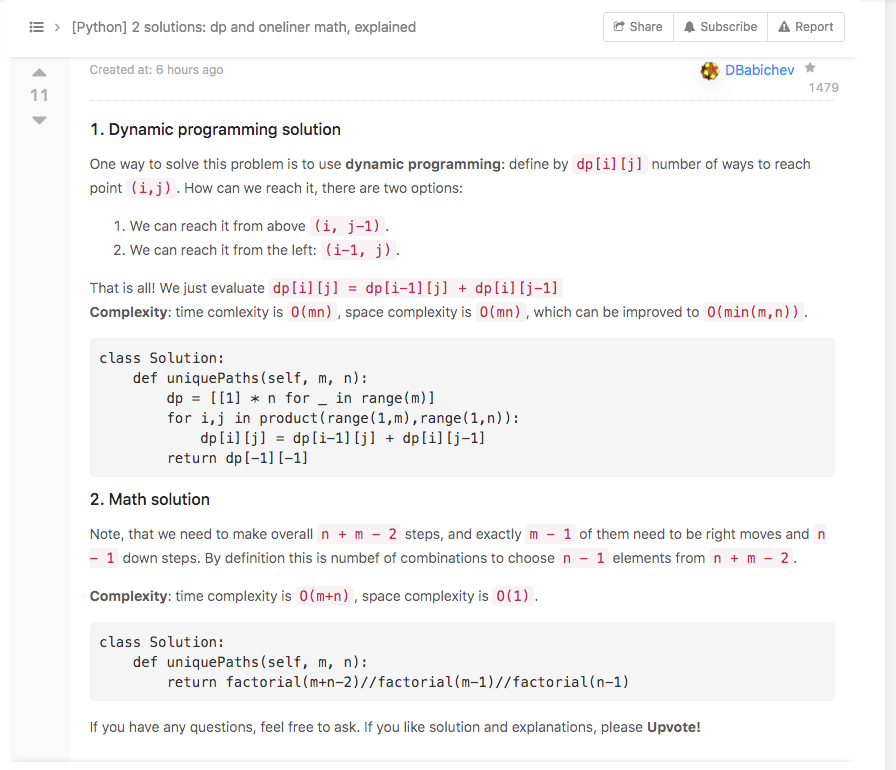

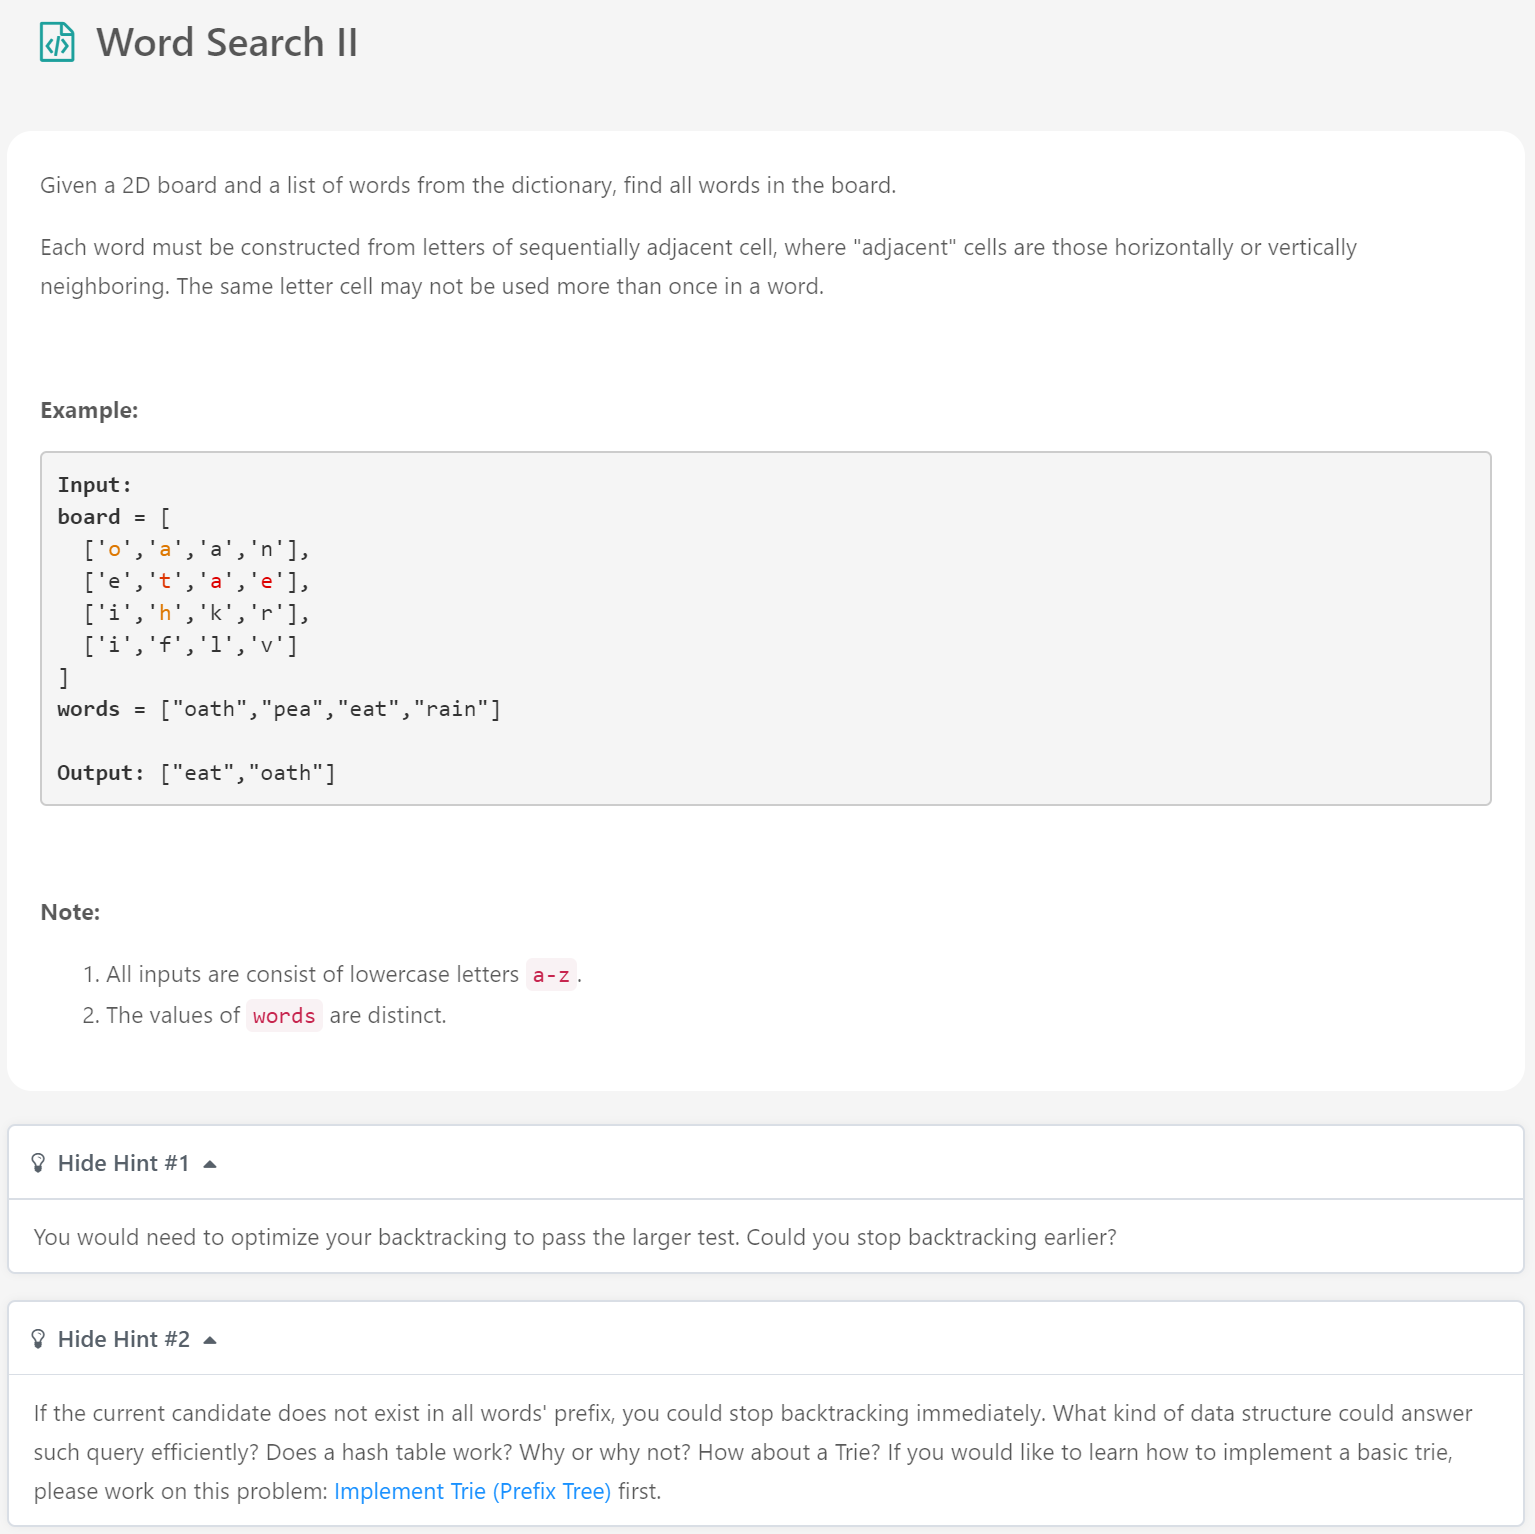

In [ ]:
''' June 30 Word Search II
* rated HARD * Phone solution 
'''
# Build a trie of words to be found
# For each starting cell of the board, if cell contains same letter as a child
# of the trie node then update node to child and recuse on 4 surrounding cells.
# Add complete words to found list and 
# overwrite the letters used in each dfs  with '*' char (not used in words) during recursion then replace before return.
# Time - O(m*n*t) where board is m by n, t: total number of chars in all words.
# Space _ O(t) for trie
class Node:
    def __init__(self):
        self.children = {} # map letter to child node
        self.word = None
        
class Solution:
    def DFS(self, board, node, r, c, found):
        # Depth first search of board
        # 1. Limit check
        if r < 0 or r >= len(board) or c < 0 or c >= len(board[0]):
            return
        # 2. Letter check start
        letter = board[r][c]
        
        if letter not in node.children:
            return 
        # 3. found word and save to results
        node = node.children[letter]
        if node.word:
            found.append(node.word)
            node.word = None # reset to avoid duplication results
            
        # 4. temporarily flag this cell as being checked
        board[r][c] = '*'
        self.DFS(board,node,r + 1, c, found)
        self.DFS(board,node,r - 1, c, found)
        self.DFS(board,node,r, c + 1, found)
        self.DFS(board,node,r, c - 1, found)
        # 5. replace cell contents 
        board[r][c] = letter
        
        
    def findWords(self, board: List[List[str]], words: List[str]) -> List[str]:

        root = Node()
        
        # 1. build a trie
        for word in words:
            node = root
            for char in word:
                if char not in node.children:
                    node.children[char] = Node()
                node = node.children[char]
            node.word = word # node is end of complete word
            
        found = []
        for r in range(len(board)):
            for c in range(len(board[0])):
                self.DFS(board,root, r, c, found)
        return found 
        

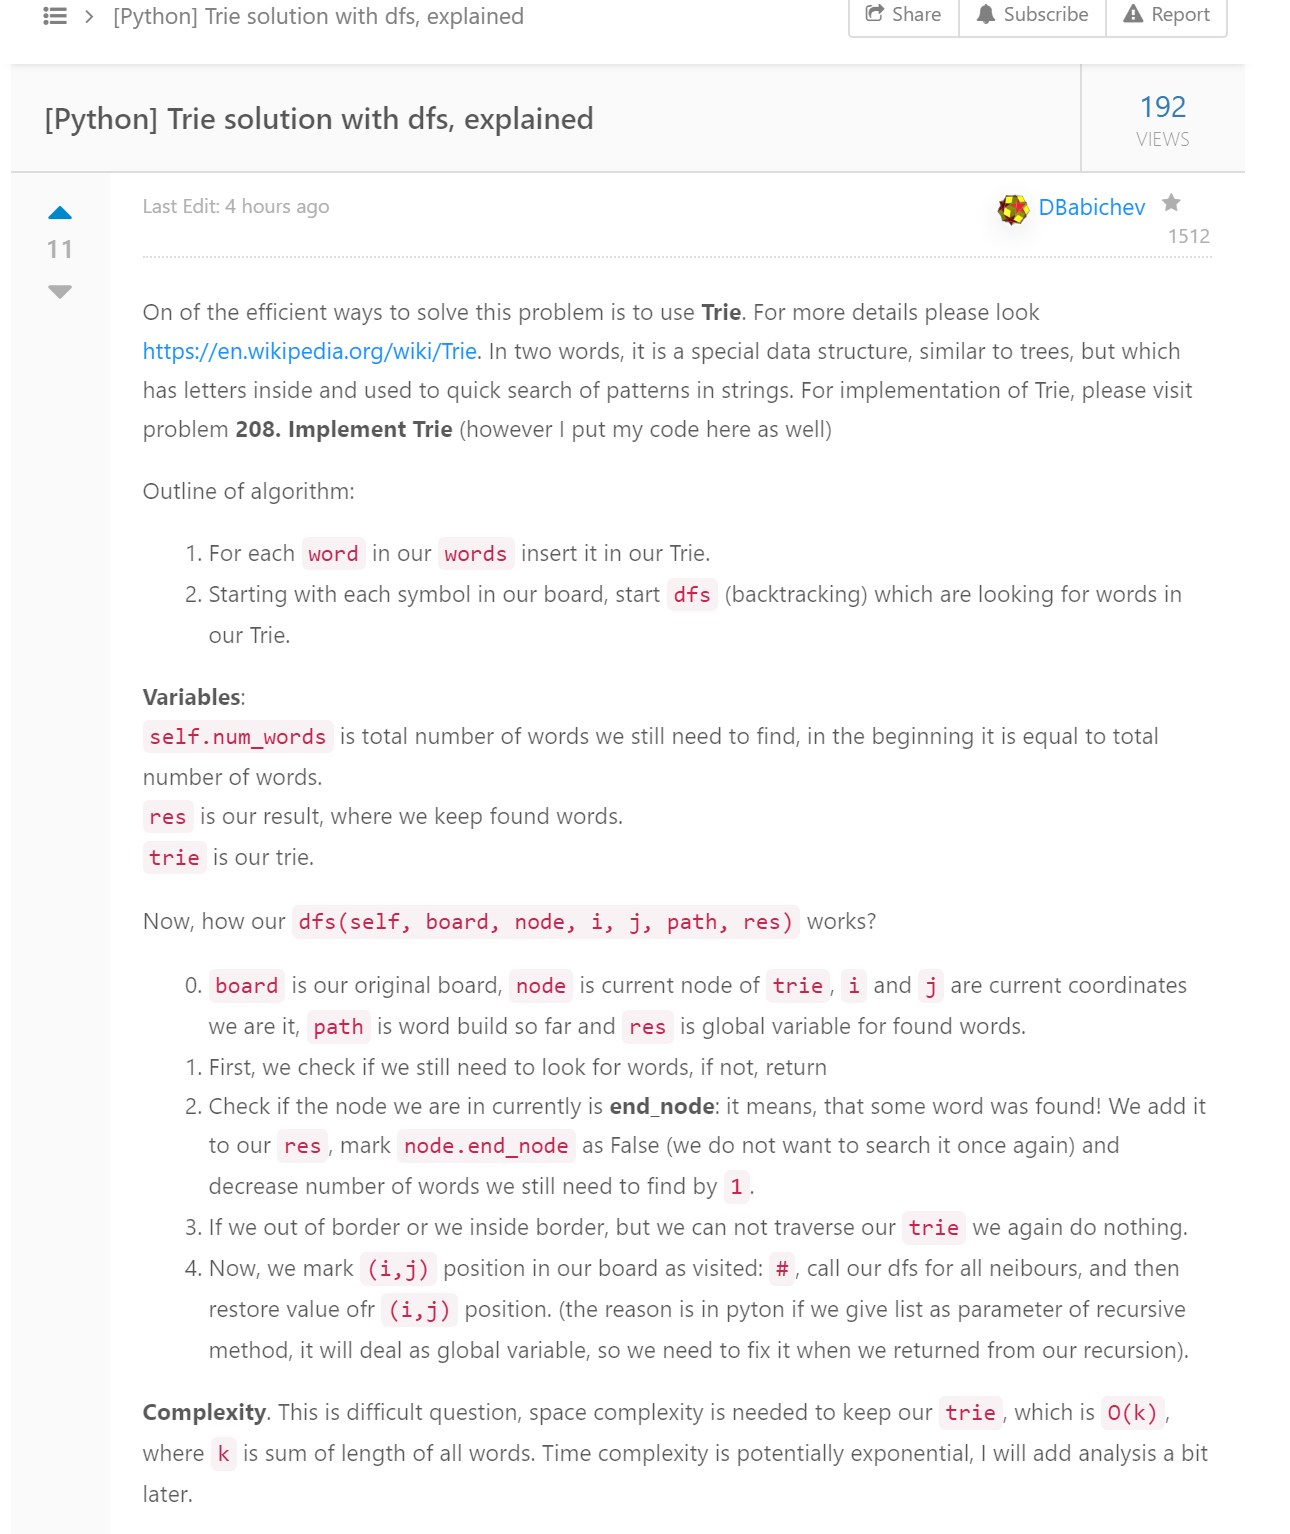

In [ ]:
# explaination source: https://leetcode.com/explore/challenge/card/june-leetcoding-challenge/543/week-5-june-29th-june-30th/3376/discuss/712733/Python-Trie-solution-with-dfs-explained
class TrieNode:
    def __init__(self):
        self.children = {}
        self.end_node = 0

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        root = self.root
        for symbol in word:
            dic_to_search = root.children
            if symbol not in dic_to_search: 
                dic_to_search[symbol] = TrieNode()
            root.children = dic_to_search
            root = root.children[symbol]
        root.end_node = 1

class Solution:
    def findWords(self, board, words):
        self.num_words = len(words)
        res, trie = [], Trie()
        for word in words: trie.insert(word) 

        for i in range(len(board)):
            for j in range(len(board[0])):
                self.dfs(board, trie.root, i, j, "", res)
        return res

    def dfs(self, board, node, i, j, path, res):
        if self.num_words == 0: return

        if node.end_node:
            res.append(path)
            node.end_node = False
            self.num_words -= 1

        if i < 0 or i >= len(board) or j < 0 or j >= len(board[0]): return 
        tmp = board[i][j]
        if tmp not in node.children: return

        board[i][j] = "#"
        for x,y in [[0,-1], [0,1], [1,0], [-1,0]]:
            self.dfs(board, node.children[tmp], i+x, j+y, path+tmp, res)
        board[i][j] = tmp

### other Python solution 
from collections import defaultdict

class TrieNode:
    def __init__(self):
        self.children = defaultdict(TrieNode) #{a:<TrieNode Object>, b:<TrieNode Object>}
        self.isWord = False
        self.word = ""

class Trie:
    def __init__(self):
        self.root = TrieNode()
    def insert(self, word):
        node = self.root
        for char in word:
            node = node.children[char]
        node.word = word
        node.isWord = True

        
class Solution:
    def __init__(self):
        self.trie = Trie()
    def findWords(self, board: List[List[str]], words: List[str]) -> List[str]:
        #add all words to a Trie
        for word in words:
            self.trie.insert(word)
  
        directions = [(0 ,1) ,(1 ,0) ,(-1 ,0) ,(0 ,-1)]   
        
        def dfs(r, c, node):
            if node.isWord:
                res.add(node.word)
            visited.add((r,c))
            for d in directions:
                r_n = r+d[0]
                c_n = c+d[1]               
                if 0 <= r_n < ROWS and 0<= c_n < COLS and (r_n, c_n) not in visited:
                    if board[r_n][c_n] not in node.children:
                        continue
                    dfs(r_n, c_n, node.children[board[r_n][c_n]])
                    visited.remove((r_n, c_n))

        ROWS = len(board)
        COLS = len(board[0])
        res = set()
        for r in range(ROWS):
            for c in range(COLS):
                root = self.trie.root
                if board[r][c] in root.children:
                    visited = set()
                    dfs(r, c, root.children[board[r][c]])
        return list(res)

In [ ]:
# Fastest solution 
import re

class Solution:
    def findWords(self, board: List[List[str]], words: List[str]) -> List[str]:
        def dfs(i, j, parent):
            letter = board[i][j]

            node = parent[letter]

            if '$' in node:
                ret.append(node.pop('$'))

            board[i][j] = ''

            i > 0 and board[i - 1][j] in node and dfs(i - 1, j, node)
            j + 1 < n and board[i][j + 1] in node and dfs(i, j + 1, node)
            i + 1 < m and board[i + 1][j] in node and dfs(i + 1, j, node)
            j > 0 and board[i][j - 1] in node and dfs(i, j - 1, node)

            board[i][j] = letter

            if not node:
                parent.pop(letter)

        alphabet = ''.join({''.join(row) for row in board})
        match = re.compile('[' + alphabet + ']{1,}').fullmatch

        words = {word.strip() for word in words if match(word)}

        root = {}

        for word in words:
            curr = root

            for letter in word:
                if letter not in curr:
                    curr[letter] = {}

                curr = curr[letter]
            curr['$'] = word

        ret = []
        m, n = len(board), len(board[0])

        for i in range(m):
            for j in range(n):
                if board[i][j] in root:
                    dfs(i, j, root)

        return ret


# Second fastest solution
class Solution:
    def findWords(self, board: List[List[str]], words: List[str]) -> List[str]: 
        def dfs(i, j, parent):
            letter = board[i][j]

            node = parent[letter]

            if '$' in node:
                ret.append(node.pop('$'))

            board[i][j] = ''

            i > 0     and board[i-1][j] in node and dfs(i-1, j, node)
            j + 1 < n and board[i][j+1] in node and dfs(i, j+1, node)
            i + 1 < m and board[i+1][j] in node and dfs(i+1, j, node)
            j > 0     and board[i][j-1] in node and dfs(i, j-1, node)

            board[i][j] = letter
            if not node:
                parent.pop(letter)

        alphabet = ''.join({''.join(row) for row in board})
        match = re.compile('[' + alphabet + ']{1,}').fullmatch

        words = {word.strip() for word in words if match(word)}
                
        root = {}
        for word in words:
            curr = root
            for letter in word:
                if letter not in curr:
                    curr[letter] = {}
                curr = curr[letter]
            curr['$'] = word

        ret = []
        m, n = len(board), len(board[0])
        for i in range(m):
            for j in range(n):
                if board[i][j] in root:
                    dfs(i, j, root)

        return ret
